In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker   
import itertools

In [2]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [3]:
df1 = pd.read_csv('NSSD_SSD_AD_model_1.csv', usecols=range(1,16))
df2 = pd.read_csv('NSSD_SSD_AD_model_2.csv', usecols=range(1,15))
df3 = pd.read_csv('NSSD_SSD_AD_model_3.csv', usecols=range(1,15))
df4 = pd.read_csv('NSSD_SSD_AD_model_4.csv', usecols=range(1,14))
df1

,"r_v,v","K_v,v","r_v,ifn",d_v,"r_ifn,v",d_ifn,"r_m,ifn","k_m,ifn",d_m,n,"r_v,m","r_ifn,m",AIC,Error,DOF
0,0,0,0,0,0,0,0,0,0,0,0,0,53.957853,14.978927,12
1,0,0,0,0,0,0,0,0,0,0,0,1,46.272959,10.136480,13
2,0,0,0,0,0,0,0,0,0,0,1,0,48.413732,11.206866,13
3,0,0,0,0,0,0,0,0,0,1,0,0,48.203323,11.101662,13
4,0,0,0,0,0,0,0,0,1,0,0,0,45.184996,9.592498,13
5,0,0,0,0,0,0,0,1,0,0,0,0,44.175552,9.087776,13
6,0,0,0,0,0,0,1,0,0,0,0,0,44.327741,9.163871,13
7,0,0,0,0,0,1,0,0,0,0,0,0,47.209969,10.604985,13
8,0,0,0,0,1,0,0,0,0,0,0,0,39.539849,6.769925,13
9,0,0,0,1,0,0,0,0,0,0,0,0,44.878295,9.439147,13


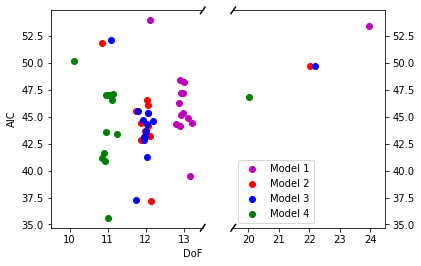

In [4]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

ax.scatter(rand_jitter(df1['DOF']), df1['AIC'], c='m', label='Model 1')
ax.scatter(rand_jitter(df2['DOF']), df2['AIC'], c='r', label='Model 2')
ax.scatter(rand_jitter(df3['DOF']), df3['AIC'], c='b', label='Model 3')
ax.scatter(rand_jitter(df4['DOF']), df4['AIC'], c='g', label='Model 4')

ax2.scatter(rand_jitter(df1['DOF']), df1['AIC'], c='m', label='Model 1')
ax2.scatter(rand_jitter(df2['DOF']), df2['AIC'], c='r', label='Model 2')
ax2.scatter(rand_jitter(df3['DOF']), df3['AIC'], c='b', label='Model 3')
ax2.scatter(rand_jitter(df4['DOF']), df4['AIC'], c='g', label='Model 4')

ax.set_xlim(9.5,13.5)
ax2.set_xlim(19.5,24.5)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelleft='off')
ax2.yaxis.tick_right()

d = .015 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

plt.legend()
ax.set_xlabel('DoF',loc='right')
ax.set_ylabel('AIC')
#plt.savefig('AIC vs DOF.svg')
plt.show()

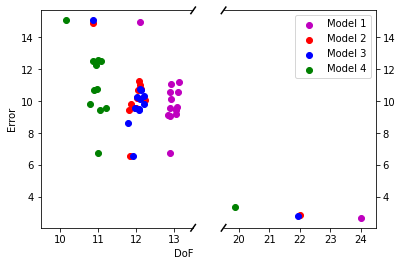

In [6]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

ax.scatter(rand_jitter(df1['DOF']), df1['Error'], c='m', label='Model 1')
ax.scatter(rand_jitter(df2['DOF']), df2['Error'], c='r', label='Model 2')
ax.scatter(rand_jitter(df3['DOF']), df3['Error'], c='b', label='Model 3')
ax.scatter(rand_jitter(df4['DOF']), df4['Error'], c='g', label='Model 4')

ax2.scatter(rand_jitter(df1['DOF']), df1['Error'], c='m', label='Model 1')
ax2.scatter(rand_jitter(df2['DOF']), df2['Error'], c='r', label='Model 2')
ax2.scatter(rand_jitter(df3['DOF']), df3['Error'], c='b', label='Model 3')
ax2.scatter(rand_jitter(df4['DOF']), df4['Error'], c='g', label='Model 4')

ax.set_xlim(9.5,13.5)
ax2.set_xlim(19.5,24.5)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelleft='off')
ax2.yaxis.tick_right()

d = .015 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

plt.legend()
ax.set_xlabel('DoF',loc='right')
ax.set_ylabel('Error')
#plt.savefig('Error vs DOF.svg')
plt.show()

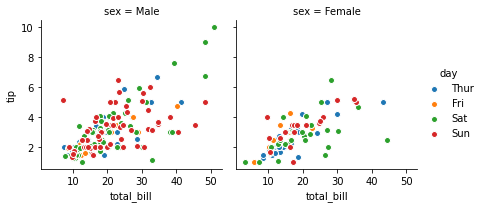

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
# loading of a dataframe from seaborn
df = sns.load_dataset('tips')
############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(df, col ="sex",  hue ="day")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "total_bill", "tip", edgecolor ="w").add_legend()
# show the object
plt.show()
df

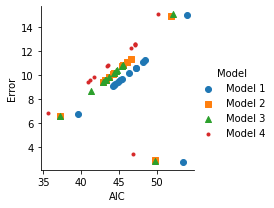

In [4]:
#Load datasets
df1 = pd.read_csv('NSSD_SSD_AD_model_1.csv', usecols=range(13,16))
df2 = pd.read_csv('NSSD_SSD_AD_model_2.csv', usecols=range(12,15))
df3 = pd.read_csv('NSSD_SSD_AD_model_3.csv', usecols=range(12,15))
df4 = pd.read_csv('NSSD_SSD_AD_model_4.csv', usecols=range(11,14))

x=[df1, df2, df3, df4] #Make a list of dataframes to iterate over
index = 1 #Because x.index(i) doesn't work when i is a dataframe
for i in x:
    #Get a Scenario label for each row, based on total rows (and thus DOF)
    label = ['NSSD']+list(itertools.repeat('OSSD',i.shape[0]-2))+['AD']
    i['Scenario'] = label
    
    #Get a Model label for each row, based on which dataframe the loop is currently on
    idx = 'Model ' + str(index)
    model = list(itertools.repeat(idx,i.shape[0]))
    i['Model'] = model
    
    index += 1
    
df = pd.concat(x) #Concatenate all the dataframes together

markers = ['o', 's', '^', '.']
hue_kws = {'marker': markers}
    
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(df, hue = "Model", hue_kws = hue_kws)
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "AIC", "Error").add_legend()
plt.savefig('by_scenario.png')

# show the object
plt.show()

/home/lucis/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/lucis/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Figure 2.svg


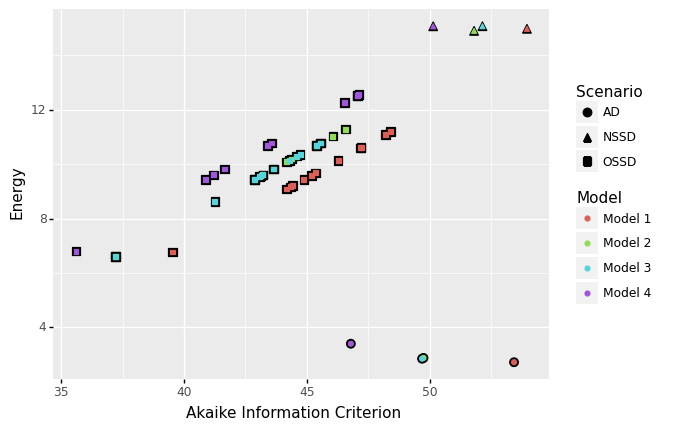

<ggplot: (8748931340255)>

In [22]:
from plotnine import ggplot, aes, labs, geom_point
import plotnine

p=(
    ggplot(df)
    + aes(x="AIC", y="Error", color="Model", shape="Scenario")
    + labs(
        x="Akaike Information Criterion",
        y="Energy",
        colour="Model",
        title="",
    )
    + geom_point(size=3, colour="black")
    + geom_point(aes(x="AIC", y="Error", color="Model", shape="Scenario"))
)
p.save('Figure 2.svg')
p